<a href="https://colab.research.google.com/github/gauwuhar/IEEE-SIST-2024/blob/main/IEEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
import sklearn as sk
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))
print("sklearn version: {}".format(sk.__version__))

pandas version: 2.0.3
numpy version: 1.25.2
seaborn version: 0.13.1
sklearn version: 1.2.2


In [ ]:
# prompt: check python version

!python --version


Python 3.10.12


In [ ]:
df = pd.read_csv('/content/Kazakhstan 1990-01-01 to 2023-11-14.csv')
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Kazakhstan,1990-01-01,-6.6,-14.8,-9.7,-13.3,-22.5,-16.7,-12.6,79.4,...,NaN,NaN,NaN,1990-01-01T09:18:17,1990-01-01T17:17:19,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,35188099999
1,Kazakhstan,1990-01-02,-8.8,-17.3,-11.4,-18.8,-28.2,-21.9,-14.1,80.2,...,NaN,NaN,NaN,1990-01-02T09:18:12,1990-01-02T17:18:21,0.18,"Snow, Overcast",Cloudy skies throughout the day with late afte...,snow,35188099999
2,Kazakhstan,1990-01-03,-8.4,-11.3,-9.5,-18.2,-21.6,-19.4,-12.4,79.1,...,NaN,NaN,NaN,1990-01-03T09:18:03,1990-01-03T17:19:27,0.22,Overcast,Cloudy skies throughout the day.,cloudy,35188099999
3,Kazakhstan,1990-01-04,-7.8,-9.9,-8.7,-16.0,-19.8,-17.8,-11.5,80.4,...,NaN,NaN,NaN,1990-01-04T09:17:51,1990-01-04T17:20:35,0.25,Overcast,Cloudy skies throughout the day.,cloudy,35188099999
4,Kazakhstan,1990-01-05,-7.8,-23.0,-16.3,-17.0,-25.1,-20.2,-19.4,76.3,...,NaN,NaN,NaN,1990-01-05T09:17:35,1990-01-05T17:21:46,0.29,Overcast,Cloudy skies throughout the day.,cloudy,35188099999


In [ ]:
harvest_df = pd.read_excel('/content/Валовый сбор англ.xls')
harvest_df.head()

,Gross harvest of basic agricultural crops,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thousand tons
1,NaN,Grain (including rise) and legumes (weight aft...,Oil seeds,of them: \nsunflower (weight after processing),Potato,Vegetables and greenhouse,Melons,Sugar beet(weight after processing)
2,1990.0,28487.7,229.8,126.3,2324.3,1136.4,301.5,1043.7
3,1991.0,11991.9,154.8,93.4,2143.2,954.9,302.7,673.8
4,1992.0,29771.7,235.4,98.5,2569.7,985.1,288.3,1160.1


# Data preprocessing


Data preproccesing of harvesting data


In [ ]:
harvest_df.describe()

,Gross harvest of basic agricultural crops
count,32.000000
mean,2005.500000
std,9.380832
min,1990.000000
25%,1997.750000
50%,2005.500000
75%,2013.250000
max,2021.000000


In [ ]:
harvest_df.head()

,Gross harvest of basic agricultural crops,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thousand tons
1,NaN,Grain (including rise) and legumes (weight aft...,Oil seeds,of them: \nsunflower (weight after processing),Potato,Vegetables and greenhouse,Melons,Sugar beet(weight after processing)
2,1990.0,28487.7,229.8,126.3,2324.3,1136.4,301.5,1043.7
3,1991.0,11991.9,154.8,93.4,2143.2,954.9,302.7,673.8
4,1992.0,29771.7,235.4,98.5,2569.7,985.1,288.3,1160.1


In [ ]:
harvest_df.isnull().sum()

Gross harvest of basic agricultural crops    2
Unnamed: 1                                   1
Unnamed: 2                                   1
Unnamed: 3                                   1
Unnamed: 4                                   1
Unnamed: 5                                   1
Unnamed: 6                                   1
Unnamed: 7                                   0
dtype: int64

In [ ]:
harvest_df = harvest_df.iloc[2: , :]
harvest_df.head()

,Gross harvest of basic agricultural crops,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
2,1990.0,28487.7,229.8,126.3,2324.3,1136.4,301.5,1043.7
3,1991.0,11991.9,154.8,93.4,2143.2,954.9,302.7,673.8
4,1992.0,29771.7,235.4,98.5,2569.7,985.1,288.3,1160.1
5,1993.0,21631,172,85.5,2296.3,808,182.3,842.7
6,1994.0,16454.1,183.5,96.8,2040.2,781.2,146.1,432.7


In [ ]:
harvest_df.isnull().sum()

Gross harvest of basic agricultural crops    0
Unnamed: 1                                   0
Unnamed: 2                                   0
Unnamed: 3                                   0
Unnamed: 4                                   0
Unnamed: 5                                   0
Unnamed: 6                                   0
Unnamed: 7                                   0
dtype: int64

In [ ]:
harvest_df.info

<bound method DataFrame.info of     Gross harvest of basic agricultural crops   Unnamed: 1   Unnamed: 2  \
2                                      1990.0      28487.7        229.8   
3                                      1991.0      11991.9        154.8   
4                                      1992.0      29771.7        235.4   
5                                      1993.0        21631          172   
6                                      1994.0      16454.1        183.5   
7                                      1995.0       9505.5          162   
8                                      1996.0      11237.3        110.5   
9                                      1997.0        12378        101.5   
10                                     1998.0       6395.5          132   
11                                     1999.0      14264.3        159.3   
12                                     2000.0        11565        140.1   
13                                     2001.0      15896.9        187.1   
14                                     2002.0      15959.9        257.1   
15                                     2003.0      14777.4        436.3   
16                                     2004.0      12374.2        395.8   
17                                     2005.0      13781.4        439.7   
18                                     2006.0      16511.5        458.9   
19                                     2007.0      20137.8        459.4   
20                                     2008.0      15578.2          414   
21                                     2009.0      20830.5        703.6   
22                                     2010.0      12185.2        775.4   
23                                     2011.0      26960.5       1141.9   
24                                     2012.0      12864.8        976.8   
25                                     2013.0      18231.1         1498   
26                                     2014.0      17162.2       1547.6   
27                                     2015.0      18672.8       1547.5   
28                                     2016.0      20634.4       1902.4   
29                                     2017.0      20585.1       2359.3   
30                                     2018.0      20273.7  2693.629968   
31                                     2019.0  17428.59135  2583.650292   
32                                     2020.0  20065.31191   2556.49754   
33                                     2021.0   16375.8766   2430.09215   

    Unnamed: 3   Unnamed: 4   Unnamed: 5   Unnamed: 6  Unnamed: 7  
2        126.3       2324.3       1136.4        301.5      1043.7  
3         93.4       2143.2        954.9        302.7       673.8  
4         98.5       2569.7        985.1        288.3      1160.1  
5         85.5       2296.3          808        182.3       842.7  
6         96.8       2040.2        781.2        146.1       432.7  
7         98.7       1719.7        779.7        162.3         371  
8         64.3       1656.5          778        181.8       340.7  
9         54.5       1472.2        879.7        181.1       127.9  
10        83.2       1262.9       1079.2        305.6       224.9  
11       104.3       1694.7       1287.1        369.6       293.9  
12       104.6       1692.6       1543.6        421.6       272.7  
13       149.1       2184.8         1782        519.2       282.4  
14       189.8       2268.8         1857        628.8       372.2  
15       292.6       2308.3       1938.3        603.8       423.6  
16       265.6       2260.7       2059.3          667       397.9  
17       267.3       2520.8       2168.7        683.8       310.8  
18         268       2361.6       2059.2        697.4         339  
19       205.8       2414.8       2196.4        661.8       309.4  
20       185.8       2354.4         2280        869.7       130.2  
21       367.9       2755.6       2457.2        852.3       181.3  
22       328.9       2554.6       2576.9       1118.2         15

In [ ]:
harvest_df.dropna(inplace=True)

<ipython-input-16-f639f9fee392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harvest_df.dropna(inplace=True)


In [ ]:
df=df[['datetime', 'temp', 'humidity', 'precip']]
df['datetime']=pd.to_datetime(df['datetime'])

<ipython-input-17-3df4ecec7cdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime']=pd.to_datetime(df['datetime'])


In [ ]:
df.isnull().sum()

datetime      0
temp        222
humidity    222
precip      222
dtype: int64

In [ ]:
df.set_index('datetime', inplace=True)

In [ ]:
df_yearly=df.resample('Y').agg(['mean', 'min', 'max'])
df_yearly.columns=['_'.join(col).strip() for col in df_yearly.columns.values]
df_yearly['year']=df_yearly.index.year

In [ ]:
df_yearly.head()

,temp_mean,temp_min,temp_max,humidity_mean,humidity_min,humidity_max,precip_mean,precip_min,precip_max,year
datetime,,,,,,,,,,
1990-12-31,3.706575,-28.4,29.2,68.501370,24.7,97.0,0.683562,0.0,50.0,1990
1991-12-31,4.324586,-32.2,28.0,63.308287,22.5,96.6,0.380110,0.0,33.0,1991
1992-12-31,2.805191,-24.8,29.9,70.669126,23.9,92.3,2.001366,0.0,230.0,1992
1993-12-31,1.781319,-28.1,25.7,69.978846,34.8,93.6,1.114835,0.0,300.0,1993
1994-12-31,3.193699,-29.2,27.9,68.243836,16.1,95.1,0.909863,0.0,258.0,1994


In [ ]:
df_yearly.isnull().sum()

temp_mean        0
temp_min         0
temp_max         0
humidity_mean    0
humidity_min     0
humidity_max     0
precip_mean      0
precip_min       0
precip_max       0
year             0
dtype: int64

In [ ]:
df_yearly.tail()

,temp_mean,temp_min,temp_max,humidity_mean,humidity_min,humidity_max,precip_mean,precip_min,precip_max,year
datetime,,,,,,,,,,
2019-12-31,3.877260,-31.7,26.3,69.643014,34.4,98.0,0.920219,0.0,27.494,2019
2020-12-31,4.679508,-24.1,27.5,68.630874,32.9,95.1,1.248445,0.0,34.833,2020
2021-12-31,3.569589,-31.1,29.2,65.909041,30.7,94.5,0.933945,0.0,24.747,2021
2022-12-31,3.978630,-28.1,27.0,64.570685,30.2,94.1,0.714082,0.0,11.820,2022
2023-12-31,7.156604,-30.6,31.2,63.269497,26.6,98.1,0.929821,0.0,28.108,2023


In [ ]:
harvest_df.tail()

,Gross harvest of basic agricultural crops,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
29,2017.0,20585.1,2359.3,902.6,3551.1,3791.1,2094,463.2
30,2018.0,20273.7,2693.629968,847.705485,3806.992427,4081.949224,2142.51505,504.541484
31,2019.0,17428.59135,2583.650292,838.710345,3912.102778,4355.234667,2382.145762,485.498606
32,2020.0,20065.31191,2556.49754,844.25613,4006.78039,4590.9231,2425.09295,466.3076
33,2021.0,16375.8766,2430.09215,1031.75391,4031.5817,4768.51402,2778.64493,332.18051


In [ ]:
df_yearly = df_yearly.iloc[:32]
df_yearly.tail()

,temp_mean,temp_min,temp_max,humidity_mean,humidity_min,humidity_max,precip_mean,precip_min,precip_max,year
datetime,,,,,,,,,,
2017-12-31,4.240274,-29.0,28.6,67.941918,32.0,98.1,0.704932,0.0,13.000,2017
2018-12-31,1.589041,-35.0,25.5,73.291507,29.9,99.4,1.174351,0.0,24.942,2018
2019-12-31,3.877260,-31.7,26.3,69.643014,34.4,98.0,0.920219,0.0,27.494,2019
2020-12-31,4.679508,-24.1,27.5,68.630874,32.9,95.1,1.248445,0.0,34.833,2020
2021-12-31,3.569589,-31.1,29.2,65.909041,30.7,94.5,0.933945,0.0,24.747,2021


In [ ]:
harvest_df.columns.tolist()

['Gross harvest of basic agricultural crops',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7']

In [ ]:
harvest_df=harvest_df.rename(columns={'Gross harvest of basic agricultural crops':'year',
                                      'Unnamed: 1' : 'grains',
                                      'Unnamed: 2' : 'oil_seeds',
                                      'Unnamed: 3' : 'sunflower',
                                      'Unnamed: 4' : 'potato',
                                      'Unnamed: 5' : 'vegetables',
                                      'Unnamed: 6' : 'melons',
                                      'Unnamed: 7' : 'sugar'})

In [ ]:
# prompt:

import pandas as pd
# Merge the two dataframes on the year column
merged_df = pd.merge(df_yearly, harvest_df, on="year")

# Print the merged dataframe
print(merged_df.head())


   temp_mean  temp_min  temp_max  humidity_mean  humidity_min  humidity_max  \
0   3.706575     -28.4      29.2      68.501370          24.7          97.0   
1   4.324586     -32.2      28.0      63.308287          22.5          96.6   
2   2.805191     -24.8      29.9      70.669126          23.9          92.3   
3   1.781319     -28.1      25.7      69.978846          34.8          93.6   
4   3.193699     -29.2      27.9      68.243836          16.1          95.1   

   precip_mean  precip_min  precip_max  year   grains oil_seeds sunflower  \
0     0.683562         0.0        50.0  1990  28487.7     229.8     126.3   
1     0.380110         0.0        33.0  1991  11991.9     154.8      93.4   
2     2.001366         0.0       230.0  1992  29771.7     235.4      98.5   
3     1.114835         0.0       300.0  1993    21631       172      85.5   
4     0.909863         0.0       258.0  1994  16454.1     183.5      96.8   

   potato vegetables melons   sugar  
0  2324.3     1136.4  30

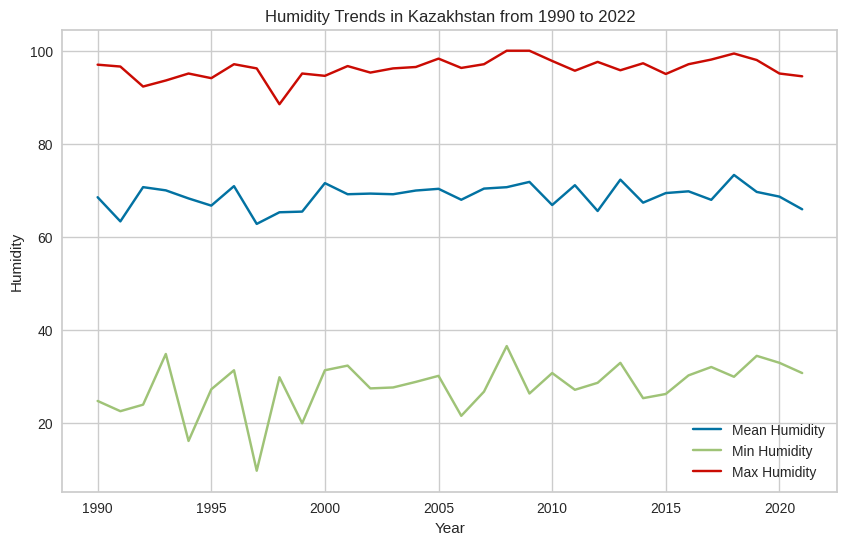

In [ ]:
# prompt: plot humidity trends

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(merged_df['year'], merged_df['humidity_mean'], label='Mean Humidity')
plt.plot(merged_df['year'], merged_df['humidity_min'], label='Min Humidity')
plt.plot(merged_df['year'], merged_df['humidity_max'], label='Max Humidity')
plt.xlabel('Year')
plt.ylabel('Humidity')
plt.title('Humidity Trends in Kazakhstan from 1990 to 2022')
plt.legend()
plt.show()


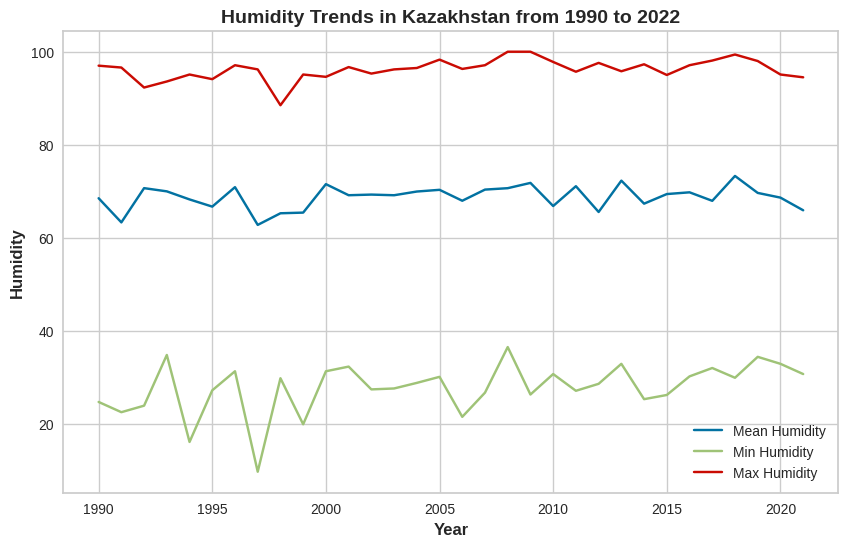

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(merged_df['year'], merged_df['humidity_mean'], label='Mean Humidity')
plt.plot(merged_df['year'], merged_df['humidity_min'], label='Min Humidity')
plt.plot(merged_df['year'], merged_df['humidity_max'], label='Max Humidity')
plt.xlabel('Year', fontsize=12, fontweight='bold')  # Adjust font size and weight for xlabel
plt.ylabel('Humidity', fontsize=12, fontweight='bold')  # Adjust font size and weight for ylabel
plt.title('Humidity Trends in Kazakhstan from 1990 to 2022', fontsize=14, fontweight='bold')  # Adjust font size and weight for title
plt.legend()
plt.show()


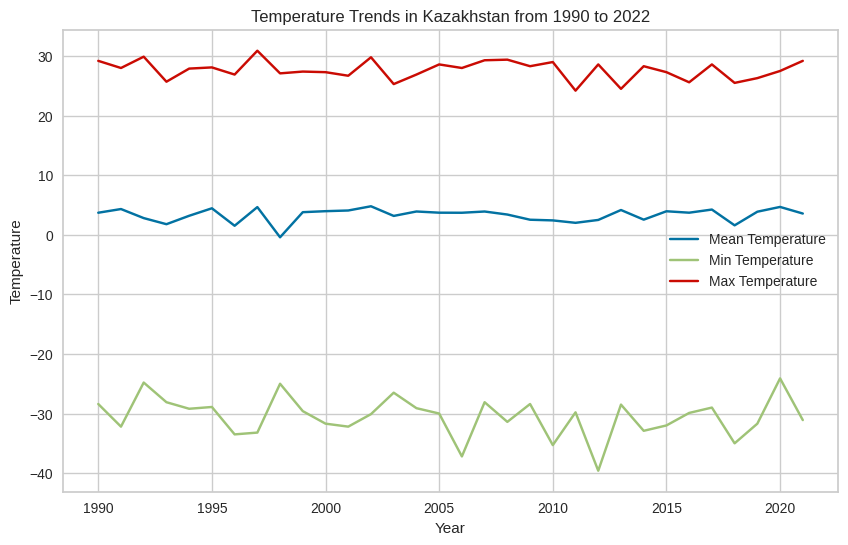

In [ ]:
# prompt: Create line plots for mean, minimum, and maximum temperature across years.

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(merged_df['year'], merged_df['temp_mean'], label='Mean Temperature')
plt.plot(merged_df['year'], merged_df['temp_min'], label='Min Temperature')
plt.plot(merged_df['year'], merged_df['temp_max'], label='Max Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Trends in Kazakhstan from 1990 to 2022')
plt.legend()
plt.show()


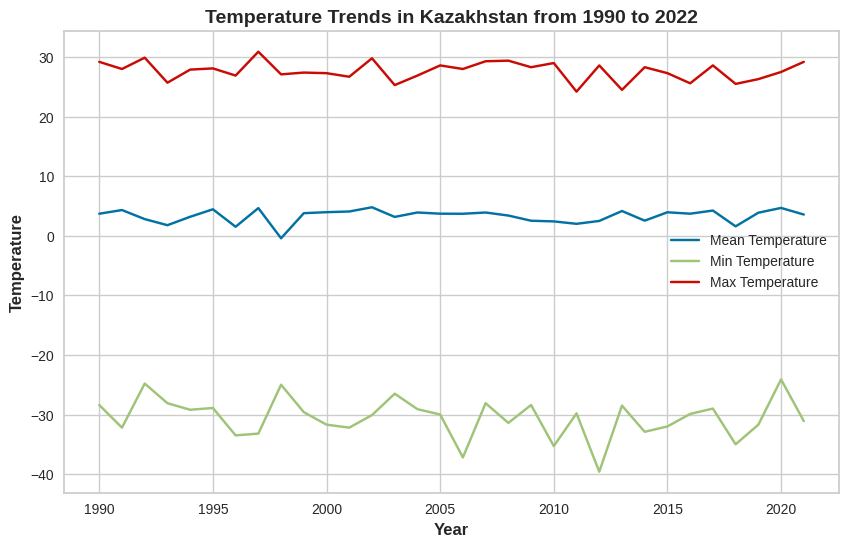

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(merged_df['year'], merged_df['temp_mean'], label='Mean Temperature')
plt.plot(merged_df['year'], merged_df['temp_min'], label='Min Temperature')
plt.plot(merged_df['year'], merged_df['temp_max'], label='Max Temperature')
plt.xlabel('Year', fontsize=12, fontweight='bold')  # Adjust font size and weight for xlabel
plt.ylabel('Temperature', fontsize=12, fontweight='bold')  # Adjust font size and weight for ylabel
plt.title('Temperature Trends in Kazakhstan from 1990 to 2022', fontsize=14, fontweight='bold')  # Adjust font size and weight for title
plt.legend()
plt.show()


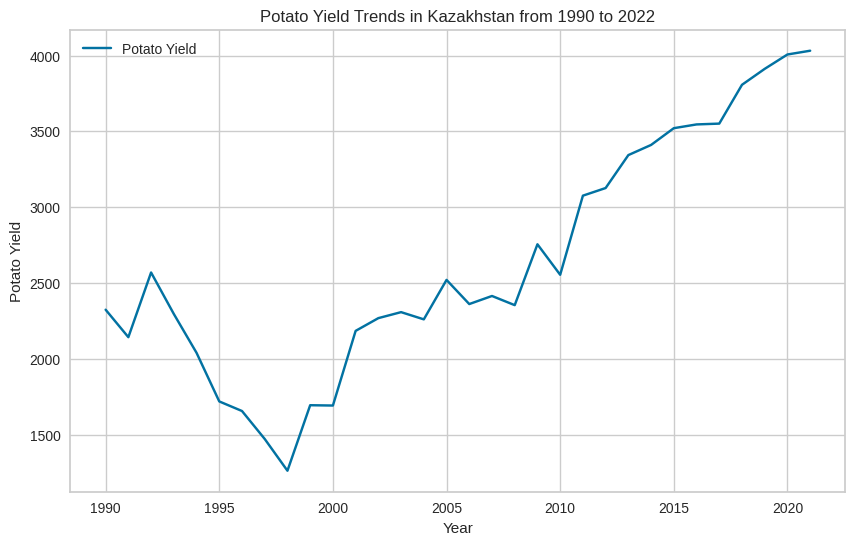

In [ ]:
# prompt: Visualize the yield of potatoes over the years using a line plot.

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(merged_df['year'], merged_df['potato'], label='Potato Yield')
plt.xlabel('Year')
plt.ylabel('Potato Yield')
plt.title('Potato Yield Trends in Kazakhstan from 1990 to 2022')
plt.legend()
plt.show()


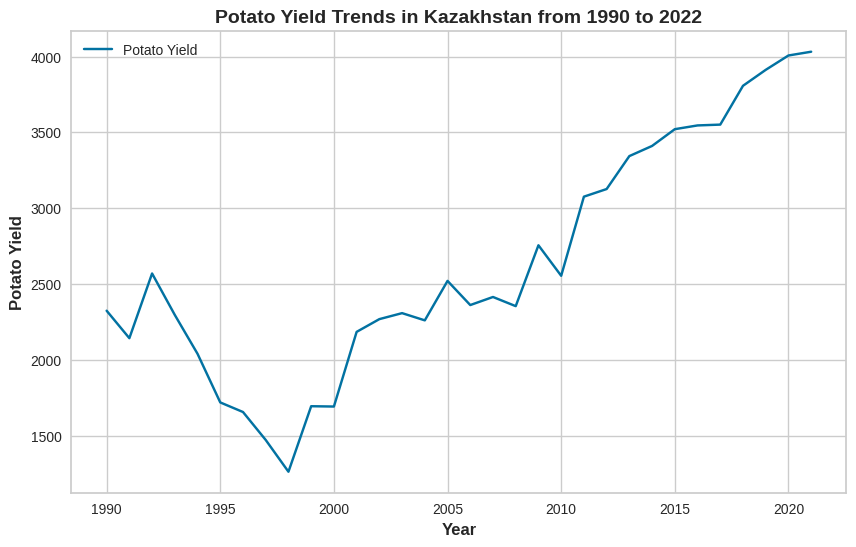

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(merged_df['year'], merged_df['potato'], label='Potato Yield')
plt.xlabel('Year', fontsize=12, fontweight='bold')  # Adjust font size and weight for xlabel
plt.ylabel('Potato Yield', fontsize=12, fontweight='bold')  # Adjust font size and weight for ylabel
plt.title('Potato Yield Trends in Kazakhstan from 1990 to 2022', fontsize=14, fontweight='bold')  # Adjust font size and weight for title
plt.legend()
plt.show()


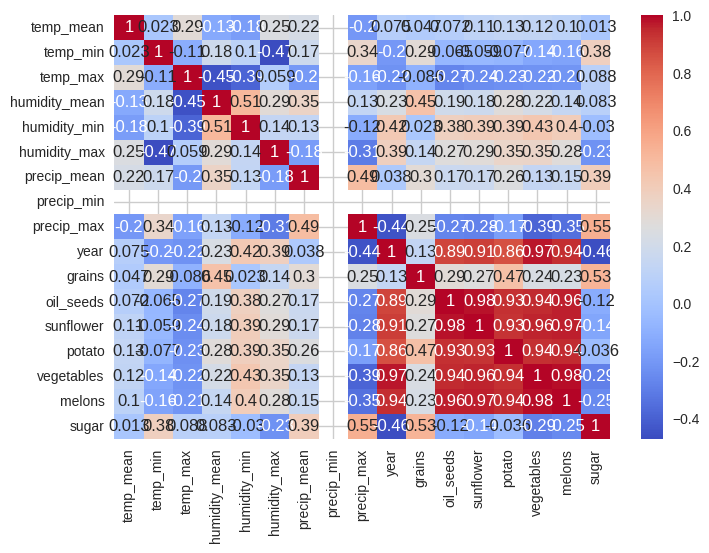

In [ ]:
# prompt: Generate a heatmap to visualize correlations between all 'temp_mean',  'temp_min',  'temp_max',  'humidity_mean',  'humidity_min',  'humidity_max',  'precip_mean',  'precip_min',  'precip_max',  'year',  'grains',  'oil_seeds',  'sunflower',  'potato',  'vegetables',  'melons',  'sugar in merged_df'

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = merged_df[['temp_mean', 'temp_min', 'temp_max', 'humidity_mean', 'humidity_min', 'humidity_max', 'precip_mean', 'precip_min', 'precip_max', 'year', 'grains', 'oil_seeds', 'sunflower', 'potato', 'vegetables', 'melons', 'sugar']].corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
merged_df.columns.tolist()

['temp_mean',
 'temp_min',
 'temp_max',
 'humidity_mean',
 'humidity_min',
 'humidity_max',
 'precip_mean',
 'precip_min',
 'precip_max',
 'year',
 'grains',
 'oil_seeds',
 'sunflower',
 'potato',
 'vegetables',
 'melons',
 'sugar']

In [ ]:
# prompt: write data type of 'year',  'grains',  'oil_seeds',  'sunflower',  'potato',  'vegetables',  'melons',  'sugar'

print(merged_df['year'].dtype)
print(merged_df['grains'].dtype)
print(merged_df['oil_seeds'].dtype)
print(merged_df['sunflower'].dtype)
print(merged_df['potato'].dtype)
print(merged_df['vegetables'].dtype)
print(merged_df['melons'].dtype)
print(merged_df['sugar'].dtype)


int32
object
object
object
object
object
object
object


In [ ]:
# prompt: change data type of  'grains',  'oil_seeds',  'sunflower',  'potato',  'vegetables',  'melons',  'sugar' from object to int64

for col in ['grains', 'oil_seeds', 'sunflower', 'potato', 'vegetables', 'melons', 'sugar']:
  merged_df[col] = merged_df[col].astype('int64')


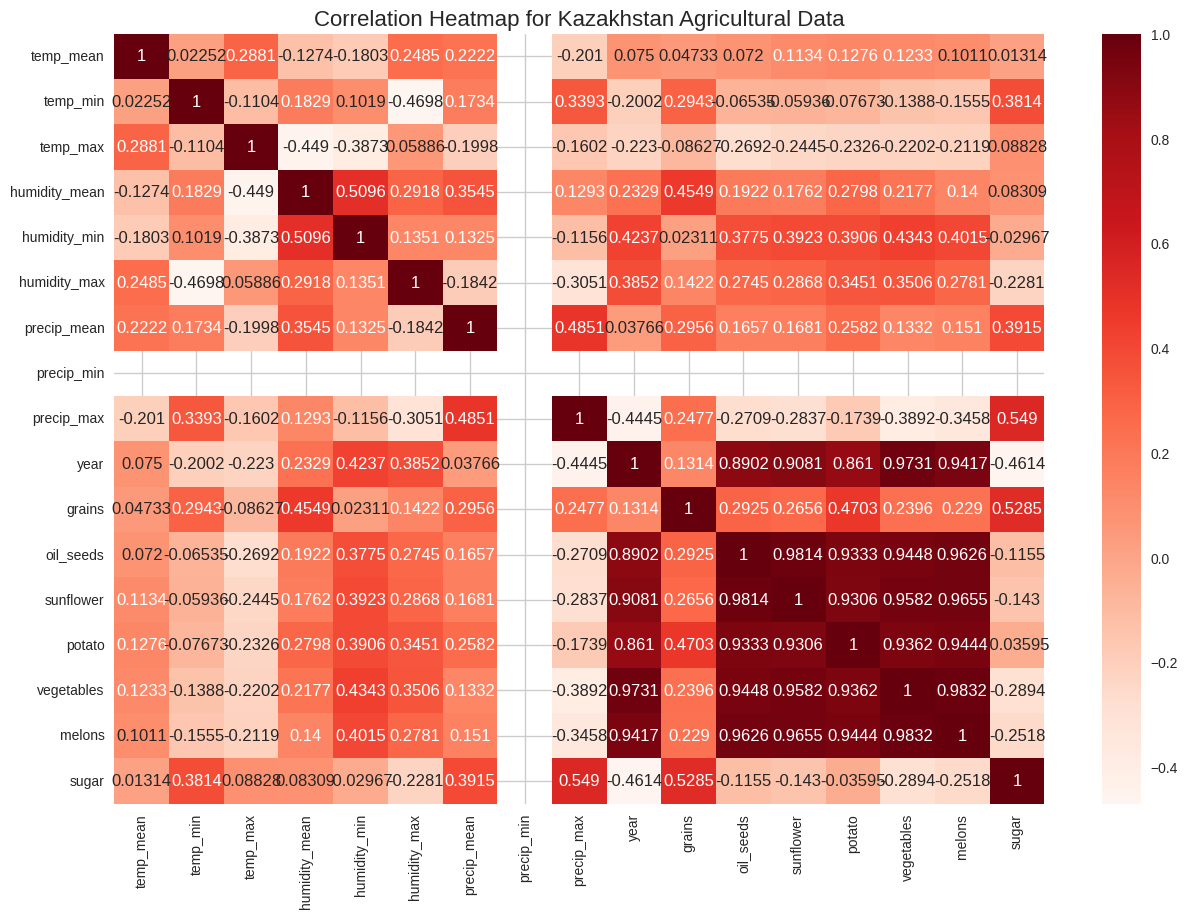

In [ ]:
# prompt: Generate a heatmap to visualize correlations between all 'temp_mean',  'temp_min',  'temp_max',  'humidity_mean',  'humidity_min',  'humidity_max',  'precip_mean',  'precip_min',  'precip_max',  'year',  'grains',  'oil_seeds',  'sunflower',  'potato',  'vegetables',  'melons',  'sugar in merged_df'  using gradient red colors  and format 4:3

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = merged_df[['temp_mean', 'temp_min', 'temp_max', 'humidity_mean', 'humidity_min', 'humidity_max', 'precip_mean', 'precip_min', 'precip_max', 'year', 'grains', 'oil_seeds', 'sunflower', 'potato', 'vegetables', 'melons', 'sugar']].corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.4g')
plt.title('Correlation Heatmap for Kazakhstan Agricultural Data', fontsize=16)
plt.show()


In [ ]:
# prompt: check if precip_min is null

merged_df['precip_min'].isnull().sum()


0

In [ ]:
# prompt: check if precip_min is object

if merged_df['precip_min'].dtype == 'object':
    print('precip_min is object type')
else:
    print('precip_min is not object type')


precip_min is not object type


In [ ]:
# prompt: output precip_min

print(merged_df['precip_min'])


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
Name: precip_min, dtype: float64


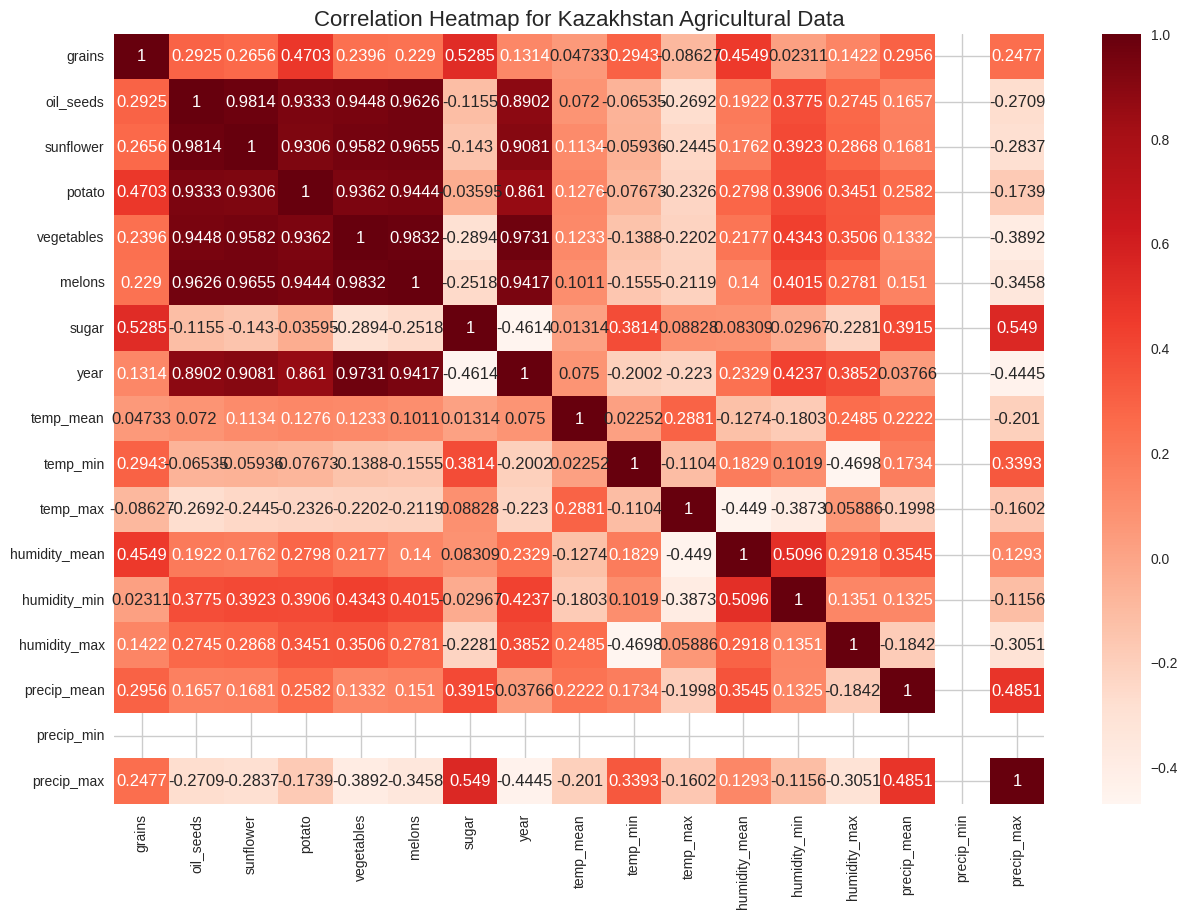

In [ ]:
# prompt: Generate a heatmap to visualize correlations between all 'temp_mean',  'temp_min',  'temp_max',  'humidity_mean',  'humidity_min',  'humidity_max',  'precip_mean',  'precip_min',  'precip_max',  'year',  'grains',  'oil_seeds',  'sunflower',  'potato',  'vegetables',  'melons',  'sugar in merged_df'  using gradient red colors  and format 4:3

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = merged_df[['grains', 'oil_seeds', 'sunflower', 'potato', 'vegetables', 'melons', 'sugar', 'year', 'temp_mean', 'temp_min', 'temp_max', 'humidity_mean', 'humidity_min', 'humidity_max', 'precip_mean', 'precip_min', 'precip_max',]].corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.4g')
plt.title('Correlation Heatmap for Kazakhstan Agricultural Data', fontsize=16)
plt.show()


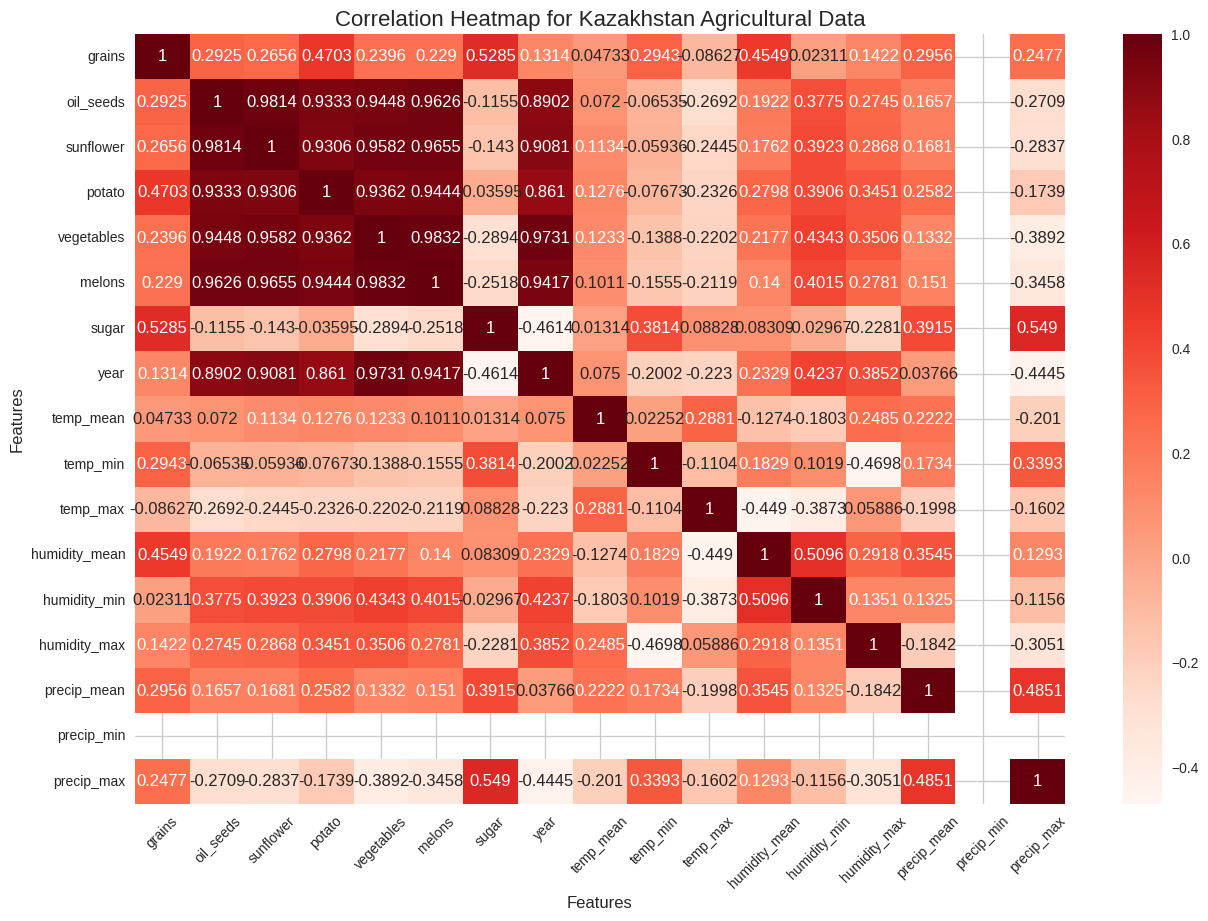

In [ ]:
# prompt: make beautiful correlations heatmap with readable text in it

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = merged_df[['grains', 'oil_seeds', 'sunflower', 'potato', 'vegetables', 'melons', 'sugar', 'year', 'temp_mean', 'temp_min', 'temp_max', 'humidity_mean', 'humidity_min', 'humidity_max', 'precip_mean', 'precip_min', 'precip_max',]].corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

# Generate a heatmap with readable text
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.4g', ax=ax)

# Add a title and labels
ax.set_title('Correlation Heatmap for Kazakhstan Agricultural Data', fontsize=16)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


In [ ]:
from plotly.subplots import make_subplots
from plotly import graph_objects as go

corr_matrix = merged_df[['grains', 'oil_seeds', 'sunflower', 'potato',
                         'vegetables', 'melons', 'sugar', 'year', 'temp_mean',
                         'temp_min', 'temp_max', 'humidity_mean', 'humidity_min',
                         'humidity_max', 'precip_mean', 'precip_max', 'precip_min']].corr()


heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Reds',
)


layout = go.Layout(
    title='Correlation Heatmap for Kazakhstan Agricultural Data',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    plot_bgcolor='light gray',
    paper_bgcolor='white',
    font=dict(color='black')
)


fig = go.Figure(data=heatmap, layout=layout)


fig.show()

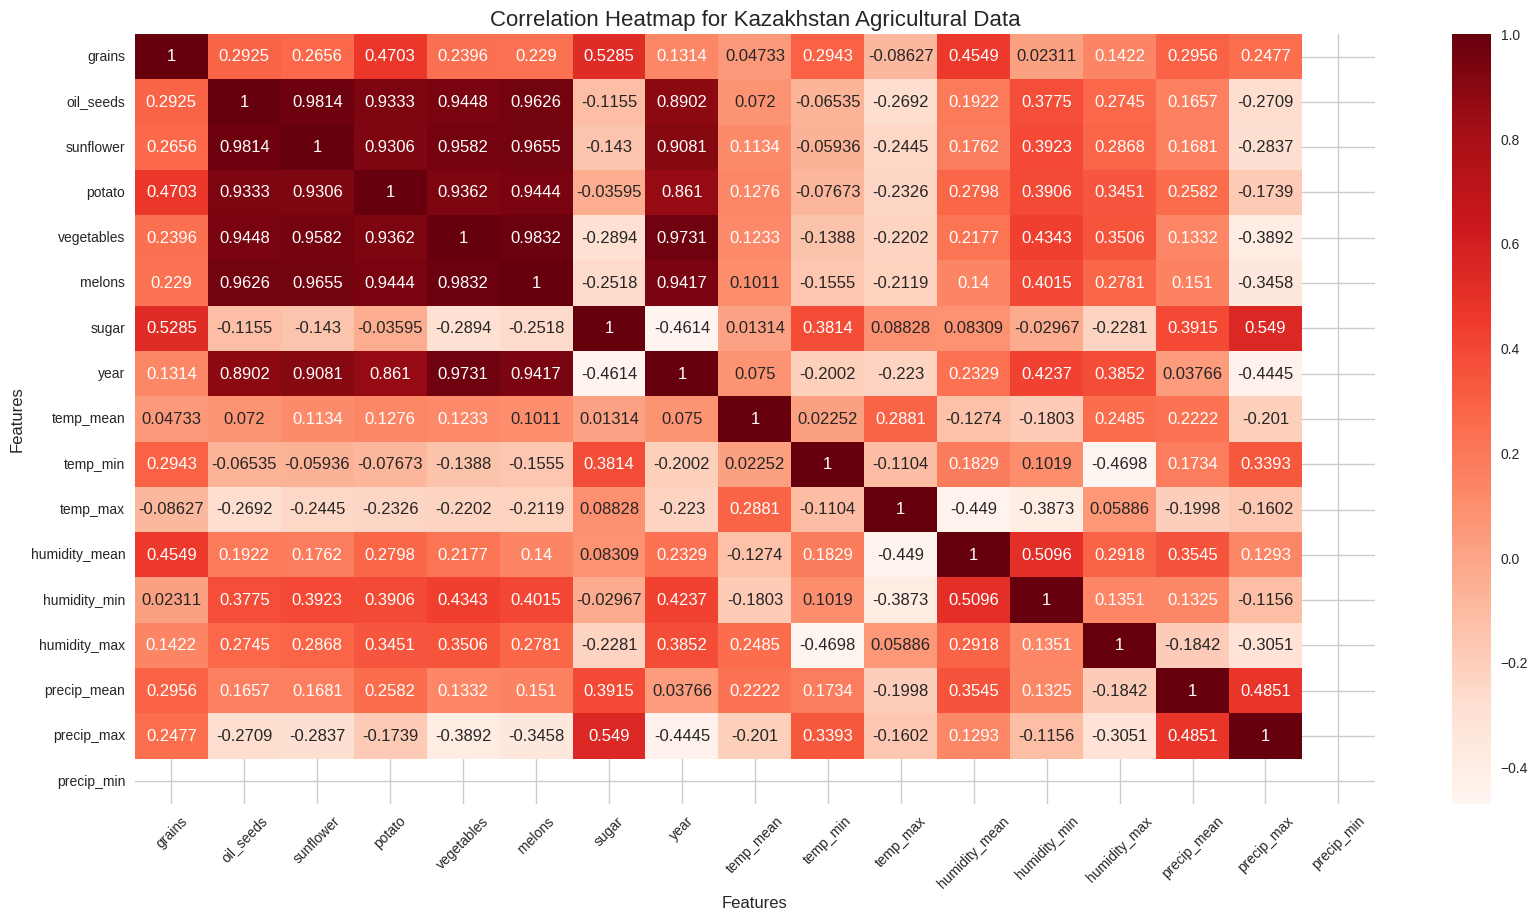

In [ ]:
# prompt: make beautiful correlations heatmap with readable text in it

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = merged_df[['grains', 'oil_seeds', 'sunflower', 'potato',
                         'vegetables', 'melons', 'sugar', 'year', 'temp_mean',
                         'temp_min', 'temp_max', 'humidity_mean', 'humidity_min',
                         'humidity_max', 'precip_mean', 'precip_max', 'precip_min',]].corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

# Generate a heatmap with readable text
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.4g', ax=ax)

# Add a title and labels
ax.set_title('Correlation Heatmap for Kazakhstan Agricultural Data', fontsize=16)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# plt.figure(figsize=(20, 10))
# sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, annot_kws={"size": 20})

# Show the heatmap
plt.show()


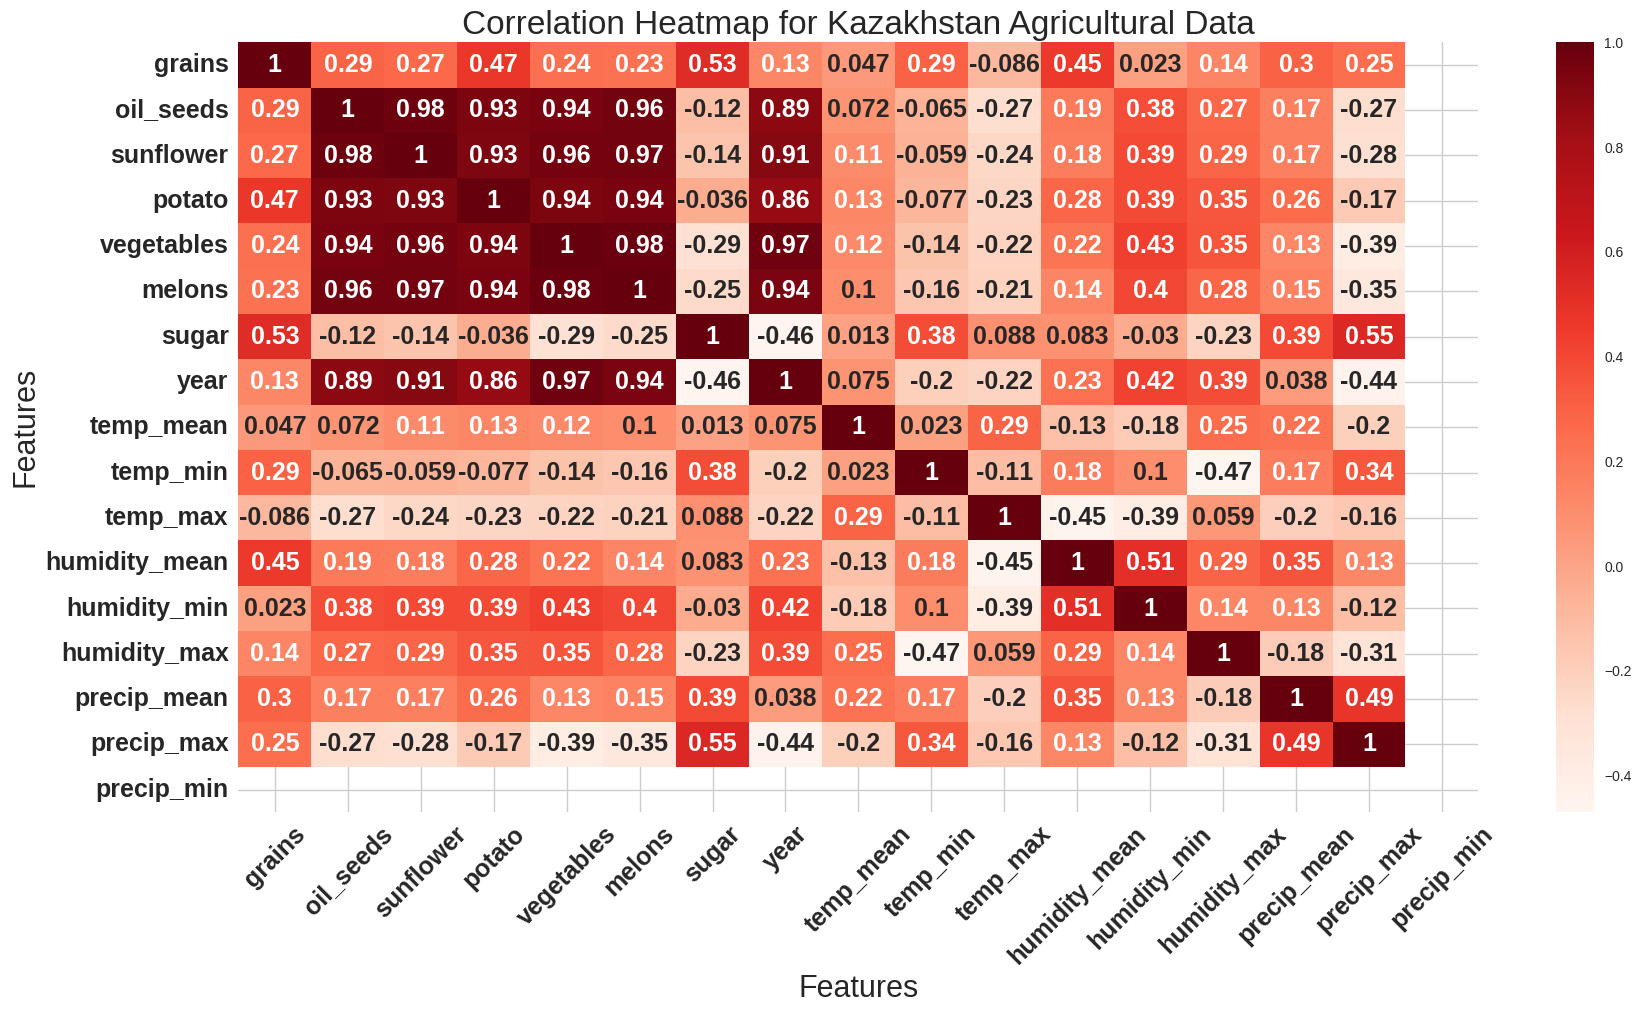

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = merged_df[['grains', 'oil_seeds', 'sunflower', 'potato',
                         'vegetables', 'melons', 'sugar', 'year', 'temp_mean',
                         'temp_min', 'temp_max', 'humidity_mean', 'humidity_min',
                         'humidity_max', 'precip_mean', 'precip_max', 'precip_min']].corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

# Generate a heatmap with readable text
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2g', ax=ax, annot_kws={"size": 18, "fontweight": 'bold'})  # Adjust font size and weight here

# Add a title and labels
ax.set_title('Correlation Heatmap for Kazakhstan Agricultural Data', fontsize=24)
ax.set_xlabel('Features', fontsize=22)
ax.set_ylabel('Features', fontsize=22)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


In [ ]:
# prompt: Split the merged dataset into training and test sets, keeping 'potato' as the target variable.

from sklearn.model_selection import train_test_split

# Define features and target variables
features = merged_df[['temp_mean', 'temp_min', 'temp_max', 'humidity_mean', 'humidity_min', 'humidity_max', 'precip_mean', 'precip_min', 'precip_max', 'grains', 'oil_seeds', 'sunflower', 'vegetables', 'melons', 'sugar']]
target = merged_df['potato']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Print the shapes of the training and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (24, 15)
y_train shape: (24,)
X_test shape: (8, 15)
y_test shape: (8,)


In [ ]:
# prompt: Scale the features using StandardScaler for the Linear Regression model.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# prompt: Train a Linear Regression model on the scaled training data.

from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Print the model coefficients
print(model.coef_)

# Print the model intercept
print(model.intercept_)


[-4.29489037e+00  1.59754650e+01 -6.00598486e+01  1.41542687e+01
 -3.92548087e+01  3.29289290e+01 -3.17586028e+01  3.48165941e-13
  5.57031239e+01  1.02370834e+02 -9.54435798e+01 -9.45651678e+01
  7.40807262e+01  7.97450887e+02  1.24631048e+02]
2559.708333333334


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import r2_score

r2_score_model = r2_score(y_test, y_pred)

print("R-squared score for Linear Regression:", r2_score_model)

print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('predicted response:', y_pred, sep='\n')

R-squared score for Linear Regression: 0.9574294148820117
intercept: 2559.708333333334
slope: [-4.29489037e+00  1.59754650e+01 -6.00598486e+01  1.41542687e+01
 -3.92548087e+01  3.29289290e+01 -3.17586028e+01  3.48165941e-13
  5.57031239e+01  1.02370834e+02 -9.54435798e+01 -9.45651678e+01
  7.40807262e+01  7.97450887e+02  1.24631048e+02]
predicted response:
[3913.43449939 2248.3389675  3356.33862775 2349.83425766 1622.64614576
 1994.49433504 3946.51940367 3619.33163728]


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with KNN algoritm

# Import the necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Create a KNN model with k=3
knn_model = KNeighborsRegressor(n_neighbors=3)

# Train the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_knn = r2_score(y_test, y_pred_knn)

# Print the R-squared score
print("R-squared score for KNN:", r2_score_knn)


R-squared score for KNN: 0.8843464202999136


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with Decision Tree algoritm

# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model with max_depth=3
dt_model = DecisionTreeRegressor(max_depth=3)

# Train the model on the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_dt = r2_score(y_test, y_pred_dt)

# Print the R-squared score
print("R-squared score for Decision Tree:", r2_score_dt)


R-squared score for Decision Tree: 0.9215113962603586


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with Random Forest algoritm

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_rf = r2_score(y_test, y_pred_rf)

# Print the R-squared score
print("R-squared score for Random Forest:", r2_score_rf)


R-squared score for Random Forest: 0.9192445857702284


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with Support Vector Machines (SVM) algoritm

# Import the necessary libraries
from sklearn.svm import SVR

# Create a SVM model with kernel='linear'
svm_model = SVR(kernel='linear')

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_svm = r2_score(y_test, y_pred_svm)

# Print the R-squared score
print("R-squared score for SVM:", r2_score_svm)


R-squared score for SVM: -0.08024422416601329


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with Gradient Boosting Regression

# Import the necessary libraries

from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting model with 100 trees
gb_model = GradientBoostingRegressor(n_estimators=100)

# Train the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_gb = r2_score(y_test, y_pred_gb)

# Print the R-squared score
print("R-squared score for Gradient Boosting:", r2_score_gb)


R-squared score for Gradient Boosting: 0.9375311220415633


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with Neural Network Regression

# Import the necessary libraries
from sklearn.neural_network import MLPRegressor

# Create a Neural Network model with 100 neurons and 3 hidden layers
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', max_iter=1000)

# Train the model on the scaled training data
nn_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_nn = r2_score(y_test, y_pred_nn)

# Print the R-squared score
print("R-squared score for Neural Network:", r2_score_nn)


R-squared score for Neural Network: 0.6238474574528994


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with ElasticNet Regression

from sklearn.linear_model import ElasticNet

# Create an ElasticNet model with alpha=0.1 and l1_ratio=0.5
en_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model on the scaled training data
en_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_en = en_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_en = r2_score(y_test, y_pred_en)

# Print the R-squared score
print("R-squared score for ElasticNet:", r2_score_en)


R-squared score for ElasticNet: 0.923911220655311


In [ ]:
# prompt: compare R-squared score of all algorithms

import pandas as pd
models = [
    {"model": "Linear Regression", "r2_score": r2_score_model},
    {"model": "KNN", "r2_score": r2_score_knn},
    {"model": "Decision Tree", "r2_score": r2_score_dt},
    {"model": "Random Forest", "r2_score": r2_score_rf},
    {"model": "SVM", "r2_score": r2_score_svm},
    {"model": "Gradient Boosting", "r2_score": r2_score_gb},
    {"model": "Neural Network", "r2_score": r2_score_nn},
    {"model": "ElasticNet", "r2_score": r2_score_en},
]

df_models = pd.DataFrame(models)

df_models.sort_values(by="r2_score", ascending=False)


,model,r2_score
0,Linear Regression,0.957429
5,Gradient Boosting,0.937531
7,ElasticNet,0.923911
2,Decision Tree,0.921511
3,Random Forest,0.919245
1,KNN,0.884346
6,Neural Network,0.623847
4,SVM,-0.080244


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with Lasso Regression (L1 regularization)

# Import the necessary libraries
from sklearn.linear_model import Lasso

# Create a Lasso model with alpha=0.1
lasso_model = Lasso(alpha=0.1)

# Train the model on the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_lasso = r2_score(y_test, y_pred_lasso)

# Print the R-squared score
print("R-squared score for Lasso Regression:", r2_score_lasso)



R-squared score for Lasso Regression: 0.9569687976085934


In [ ]:
# prompt: Predict on the test set and evaluate the model using the R-squared metric, now with Ridge Regression (L2 regularization)Ridge Regression (L2 regularization): Similar to Lasso regression, but instead of adding a penalty to the absolute value of the coefficients, it adds a penalty to the squared magnitude of the coefficients.

from sklearn.linear_model import Ridge

# Create a Ridge model with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Train the model on the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model using the R-squared metric
r2_score_ridge = r2_score(y_test, y_pred_ridge)

# Print the R-squared score
print("R-squared score for Ridge Regression:", r2_score_ridge)


R-squared score for Ridge Regression: 0.9491540693116935


In [ ]:
# prompt: compare R-squared score of all algorithms

import pandas as pd
models = [
    {"model": "Linear Regression", "r2_score": r2_score_model},
    {"model": "KNN", "r2_score": r2_score_knn},
    {"model": "Decision Tree", "r2_score": r2_score_dt},
    {"model": "Random Forest", "r2_score": r2_score_rf},
    {"model": "SVM", "r2_score": r2_score_svm},
    {"model": "Gradient Boosting", "r2_score": r2_score_gb},
    {"model": "Neural Network", "r2_score": r2_score_nn},
    {"model": "ElasticNet", "r2_score": r2_score_en},
    {"model": "Lasso Regression", "r2_score": r2_score_lasso},
    {"model": "Ridge Regression", "r2_score": r2_score_ridge},
]

df_models = pd.DataFrame(models)

df_models.sort_values(by="r2_score", ascending=False)


,model,r2_score
0,Linear Regression,0.957429
8,Lasso Regression,0.956969
9,Ridge Regression,0.949154
5,Gradient Boosting,0.937531
7,ElasticNet,0.923911
2,Decision Tree,0.921511
3,Random Forest,0.919245
1,KNN,0.884346
6,Neural Network,0.623847
4,SVM,-0.080244


In [ ]:
# prompt: print coefs of lasso and ridge

print('Lasso coefficients:', lasso_model.coef_)
print('Ridge coefficients:', ridge_model.coef_)


Lasso coefficients: [ -5.21595226  15.28011447 -59.03899721  11.21157332 -36.53490215
  32.26227465 -29.7417228    0.          54.64874258 104.93673617
 -89.94729294 -87.76051413  75.62340687 781.47563424 121.04276348]
Ridge coefficients: [-14.62000474  11.60263141 -49.77651011 -20.2697316  -13.50349271
  21.96777061 -14.78183155   0.          48.97431916 121.12095813
 -12.60384591 -56.58687046 185.1115038  553.06930423  97.07227901]


In [ ]:
# prompt: SVR coefs

print('SVM coefficients:', svm_model.coef_)


SVM coefficients: [[-7.19845687 -3.37775493 -1.90682839  4.11740496  3.1113901   4.82819927
  -0.94964418  0.         -6.18427968 12.9582071  15.87413416 15.57215907
  15.90506892 16.10116235  0.25381906]]


In [ ]:
# prompt: write Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), R-squared (R^2) Score,Explained Variance Score for each algorithm

import pandas as pd
import numpy as np
# Import the necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Calculate the performance metrics for each model
mse_linear_regression = mean_squared_error(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mse_en = mean_squared_error(y_test, y_pred_en)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

mae_linear_regression = mean_absolute_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mae_en = mean_absolute_error(y_test, y_pred_en)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

rmse_linear_regression = np.sqrt(mse_linear_regression)
rmse_knn = np.sqrt(mse_knn)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)
rmse_svm = np.sqrt(mse_svm)
rmse_gb = np.sqrt(mse_gb)
rmse_nn = np.sqrt(mse_nn)
rmse_en = np.sqrt(mse_en)
rmse_lasso = np.sqrt(mse_lasso)
rmse_ridge = np.sqrt(mse_ridge)

r2_score_linear_regression = r2_score(y_test, y_pred)
r2_score_knn = r2_score(y_test, y_pred_knn)
r2_score_dt = r2_score(y_test, y_pred_dt)
r2_score_rf = r2_score(y_test, y_pred_rf)
r2_score_svm = r2_score(y_test, y_pred_svm)
r2_score_gb = r2_score(y_test, y_pred_gb)
r2_score_nn = r2_score(y_test, y_pred_nn)
r2_score_en = r2_score(y_test, y_pred_en)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
r2_score_ridge = r2_score(y_test, y_pred_ridge)

explained_variance_score_linear_regression = explained_variance_score(y_test, y_pred)
explained_variance_score_knn = explained_variance_score(y_test, y_pred_knn)
explained_variance_score_dt = explained_variance_score(y_test, y_pred_dt)
explained_variance_score_rf = explained_variance_score(y_test, y_pred_rf)
explained_variance_score_svm = explained_variance_score(y_test, y_pred_svm)
explained_variance_score_gb = explained_variance_score(y_test, y_pred_gb)
explained_variance_score_nn = explained_variance_score(y_test, y_pred_nn)
explained_variance_score_en = explained_variance_score(y_test, y_pred_en)
explained_variance_score_lasso = explained_variance_score(y_test, y_pred_lasso)
explained_variance_score_ridge = explained_variance_score(y_test, y_pred_ridge)

# Create a DataFrame to display the performance metrics
models = [
    {"model": "Linear Regression", "MSE": mse_linear_regression, "MAE": mae_linear_regression, "RMSE": rmse_linear_regression, "R^2 Score": r2_score_linear_regression, "Explained Variance Score": explained_variance_score_linear_regression},
    {"model": "KNN", "MSE": mse_knn, "MAE": mae_knn, "RMSE": rmse_knn, "R^2 Score": r2_score_knn, "Explained Variance Score": explained_variance_score_knn},
    {"model": "Decision Tree", "MSE": mse_dt, "MAE": mae_dt, "RMSE": rmse_dt, "R^2 Score": r2_score_dt, "Explained Variance Score": explained_variance_score_dt},
    {"model": "Random Forest", "MSE": mse_rf, "MAE": mae_rf, "RMSE": rmse_rf, "R^2 Score": r2_score_rf, "Explained Variance Score": explained_variance_score_rf},
    {"model": "SVM", "MSE": mse_svm, "MAE": mae_svm, "RMSE": rmse_svm, "R^2 Score": r2_score_svm, "Explained Variance Score": explained_variance_score_svm},
    {"model": "Gradient Boosting", "MSE": mse_gb, "MAE": mae_gb, "RMSE": rmse_gb, "R^2 Score": r2_score_gb, "Explained Variance Score": explained_variance_score_gb},
    {"model": "Neural Network", "MSE": mse_nn, "MAE": mae_nn, "RMSE": rmse_nn, "R^2 Score": r2_score_nn, "Explained Variance Score": explained_variance_score_nn},
    {"model": "ElasticNet", "MSE": mse_en, "MAE": mae_en, "RMSE": rmse_en, "R^2 Score": r2_score_en, "Explained Variance Score": explained_variance_score_en},
    {"model": "Lasso Regression", "MSE": mse_lasso, "MAE": mae_lasso, "RMSE": rmse_lasso, "R^2 Score": r2_score_lasso, "Explained Variance Score": explained_variance_score_lasso},
    {"model": "Ridge Regression", "MSE": mse_ridge, "MAE": mae_ridge, "RMSE": rmse_ridge, "R^2 Score": r2_score_ridge, "Explained Variance Score": explained_variance_score_ridge},
]

df_models = pd.DataFrame(models)

df_models.sort_values(by="R^2 Score", ascending=False)


,model,MSE,MAE,RMSE,R^2 Score,Explained Variance Score
0,Linear Regression,39296.012475,151.234420,198.232219,0.957429,0.959077
8,Lasso Regression,39721.198600,151.286884,199.301778,0.956969,0.958534
9,Ridge Regression,46934.810059,148.381030,216.644432,0.949154,0.951090
5,Gradient Boosting,57663.708421,198.419844,240.132689,0.937531,0.937595
7,ElasticNet,70235.953160,208.773067,265.020666,0.923911,0.924067
2,Decision Tree,72451.180625,213.150000,269.167570,0.921511,0.921901
3,Random Forest,74543.625750,213.527500,273.026786,0.919245,0.919413
1,KNN,106757.388889,285.250000,326.737492,0.884346,0.886212
6,Neural Network,347218.506944,510.933173,589.252498,0.623847,0.753305
4,SVM,997150.741320,863.228665,998.574354,-0.080244,0.152299
